In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the three datasets

In [3]:
df_user=pd.read_csv('users.dat',sep="::",names=['UserID','Gender','Age','Occupation','Zip Code'],engine='python') 
# Open the file, no names, so names=..., engine=python- to make it enable to work with python

In [5]:
df_user

,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [8]:
df_movies=pd.read_csv('movies.dat',sep="::",names=['MovieID','Title','Generes'],engine='python',encoding='latin-1')

In [9]:
df_movies

,MovieID,Title,Generes
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
df_ratings=pd.read_csv('ratings.dat',sep="::",names=['UserID','MovieID','Rating','Timestamp'],engine='python')

In [11]:
df_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [12]:
df_user.shape

(6040, 5)

In [13]:
df_movies.shape

(3883, 3)

In [14]:
df_ratings.shape

(1000209, 4)

### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
(Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [15]:
dfMovieRatings=df_movies.merge(df_ratings,on='MovieID',how='inner')

In [16]:
dfMovieRatings

,MovieID,Title,Generes,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [17]:
dfMaster=dfMovieRatings.merge(df_user,on='UserID',how='inner')

In [18]:
dfMaster

,MovieID,Title,Generes,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [19]:
dfMaster.to_csv('Master Data.csv')

In [21]:
dfMaster.isna().sum().any()

False

### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution

User rating of the movie “Toy Story”

Top 25 movies by viewership rating

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [27]:
dfMaster['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

Text(0, 0.5, 'Title')

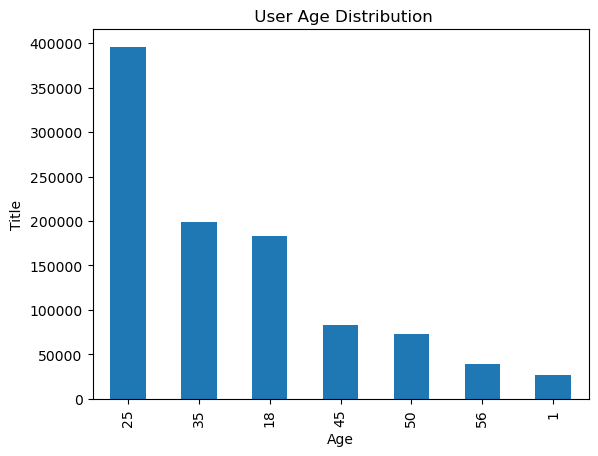

In [31]:
dfMaster['Age'].value_counts().plot(kind='bar')
plt.title(" User Age Distribution")
plt.xlabel('Age')
plt.ylabel('Title')

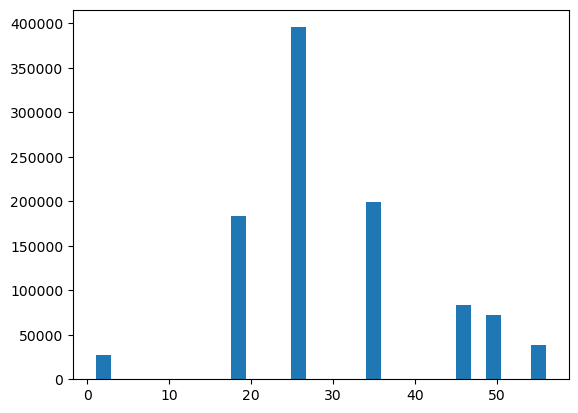

In [29]:
plt.hist(dfMaster['Age'],bins=30)
plt.show()

#### User rating of the movie “Toy Story”

In [32]:
# Extract Toy Story movies
toystory=dfMaster[dfMaster['Title'].str.contains('Toy Story')==True]
toystory

,MovieID,Title,Generes,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [33]:
toystory.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

<AxesSubplot:ylabel='Title'>

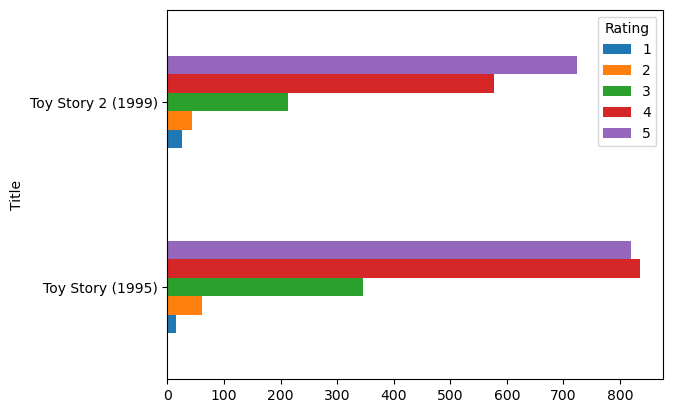

In [35]:
toystory.groupby(['Title','Rating']).size().unstack().plot(kind='barh',legend=True) #barh-Horizontal bar
                                                                                    #unstack-For pivot like structure

#### Top 25 movies by viewership rating

In [36]:
dfTop25=dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

<AxesSubplot:ylabel='Title'>

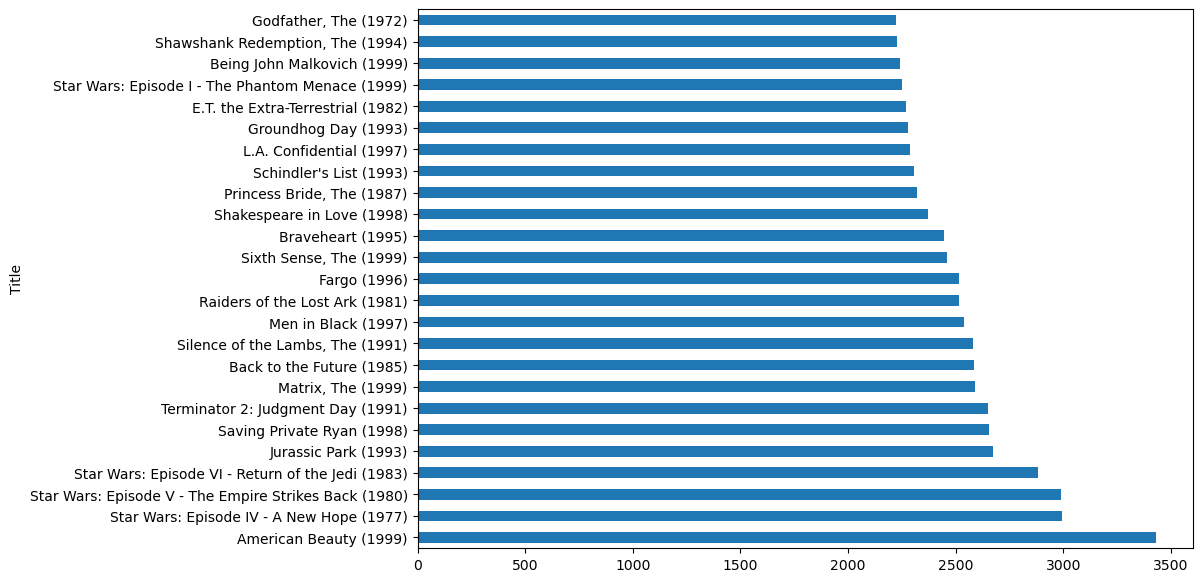

In [40]:
plt.figure(figsize=(10,7))
dfTop25.plot(kind='barh')

#### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [45]:
user_2696 = dfMaster.loc[dfMaster.UserID==2696, "Rating"].sort_values(ascending=False)
user_2696 

991036    5
991045    4
991047    4
991037    4
991053    4
991039    4
991051    4
991049    4
991042    4
991043    4
991048    4
991046    4
991035    3
991041    3
991038    3
991044    2
991050    2
991040    2
991052    1
991054    1
Name: Rating, dtype: int64

In [50]:
user_2696.shape

(20,)

In [47]:
df_2696R=dfMaster[dfMaster['UserID']==2696]
df_2696R

,MovieID,Title,Generes,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [51]:
df_2696R.shape

(20, 10)

### Feature Engineering:
Use column genres:

Find out all the unique genres 

(Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

Determine the features affecting the ratings of any particular movie.

Develop an appropriate model to predict the movie ratings

In [52]:
dfMaster['Generes']

0                   Animation|Children's|Comedy
1          Animation|Children's|Musical|Romance
2                                         Drama
3               Action|Adventure|Fantasy|Sci-Fi
4                                     Drama|War
                           ...                 
1000204                          Drama|Thriller
1000205                  Comedy|Horror|Thriller
1000206                          Comedy|Romance
1000207                         Action|Thriller
1000208                            Action|Drama
Name: Generes, Length: 1000209, dtype: object

In [55]:
dfGeneres=dfMaster['Generes'].str.split('|') #Removes | and converts to list

In [54]:
dfGeneres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Generes, Length: 1000209, dtype: object

In [56]:
listgeneres=set() #constructor method
for genre in dfGeneres:
    listgeneres=listgeneres.union(set(genre)) #union(AUB,probability),set -to concat without duplicates, arranges alphabetical order

In [57]:
listgeneres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [58]:
len(listgeneres)

18

### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [59]:
GeneresOnehot=dfMaster['Generes'].str.get_dummies('|')

In [60]:
GeneresOnehot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
dfMaster=pd.concat([dfMaster,GeneresOnehot],axis=1)

In [62]:
dfMaster

,MovieID,Title,Generes,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


In [63]:
dfMaster.to_csv('New Master.csv')

### Determine the features affecting the ratings of any particular movie.

In [66]:
dfMaster.dtypes

MovieID         int64
Title          object
Generes        object
UserID          int64
Rating          int64
Timestamp       int64
Gender         object
Age             int64
Occupation      int64
Zip Code       object
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [67]:
#convert gender into integer
dfMaster['Gender']=dfMaster['Gender'].replace('M','0')
dfMaster['Gender']=dfMaster['Gender'].replace('F','1')

In [65]:
dfMaster

,MovieID,Title,Generes,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,0,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,0,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,0,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,0,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


In [68]:
dfMaster['Gender']=dfMaster['Gender'].astype('int')

##### Impact rating

In [70]:
# Gender vs rating
GenderAffecting=dfMaster.groupby('Gender').size().sort_values(ascending=False)

In [71]:
GenderAffecting

Gender
0    753769
1    246440
dtype: int64

<AxesSubplot:xlabel='Gender'>

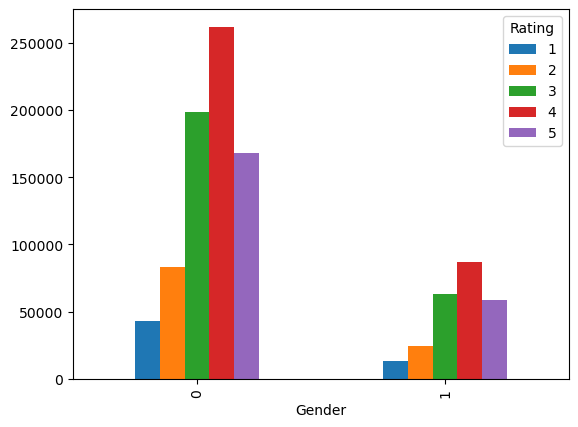

In [72]:
dfMaster.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',legend=True)

<AxesSubplot:xlabel='Age'>

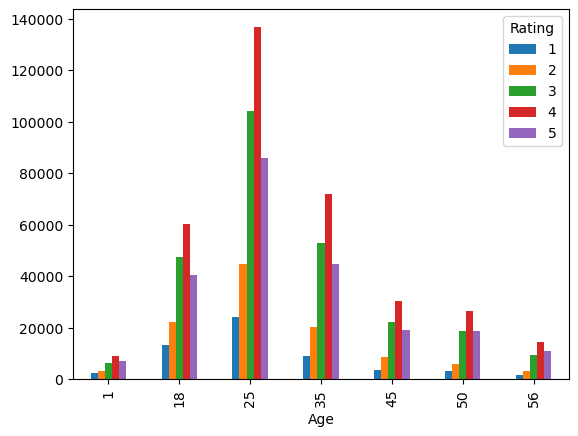

In [73]:
# Age vs Rating
dfMaster.groupby(['Age','Rating']).size().unstack().plot(kind='bar',legend=True)

<AxesSubplot:xlabel='Occupation'>

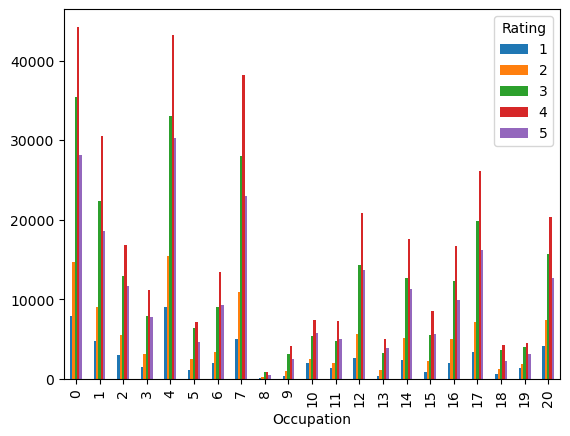

In [76]:
# Occupation vs Rating
dfMaster.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar',legend=True)

#### Develop an appropriate model to predict the movie ratings

In [77]:
# first 500 records
new_data=dfMaster[:500]
new_data

,MovieID,Title,Generes,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,10,5,979167660,1,35,1,95370,...,0,0,0,0,0,1,0,0,0,0
496,1198,Raiders of the Lost Ark (1981),Action|Adventure,10,5,978225630,1,35,1,95370,...,0,0,0,0,0,0,0,0,0,0
497,1200,Aliens (1986),Action|Sci-Fi|Thriller|War,10,5,979168160,1,35,1,95370,...,0,0,0,0,0,0,1,1,1,0
498,1201,"Good, The Bad and The Ugly, The (1966)",Action|Western,10,2,978225853,1,35,1,95370,...,0,0,0,0,0,0,0,0,0,1


In [78]:
fetures=new_data[['MovieID','Age','Occupation','Gender']]

In [79]:
fetures

,MovieID,Age,Occupation,Gender
0,1,1,10,1
1,48,1,10,1
2,150,1,10,1
3,260,1,10,1
4,527,1,10,1
...,...,...,...,...
495,1197,35,1,1
496,1198,35,1,1
497,1200,35,1,1
498,1201,35,1,1


In [80]:
fetures=new_data[['MovieID','Age','Occupation','Gender']].values

In [81]:
fetures

array([[   1,    1,   10,    1],
       [  48,    1,   10,    1],
       [ 150,    1,   10,    1],
       ...,
       [1200,   35,    1,    1],
       [1201,   35,    1,    1],
       [1203,   35,    1,    1]], dtype=int64)

In [83]:
label=new_data[['Rating']].values
label

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(fetures,label,test_size=0.20,random_state=42)

In [86]:
X_train.shape

(400, 4)

In [87]:
X_test.shape

(100, 4)

In [90]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [91]:
lr.fit(X_train,y_train)

LinearRegression()

In [92]:
lr.predict(X_test)

array([[3.46596348],
       [3.96471588],
       [4.31047093],
       [3.99788954],
       [3.68849118],
       [4.27254115],
       [4.30172875],
       [4.05316268],
       [4.02252707],
       [4.18751639],
       [4.2936504 ],
       [3.81923886],
       [4.26506799],
       [3.90352061],
       [4.31625205],
       [4.28057831],
       [4.14845859],
       [4.13671417],
       [3.75346841],
       [4.24955767],
       [4.15804678],
       [4.15720077],
       [3.90518754],
       [3.49627911],
       [3.96076779],
       [4.18032524],
       [4.14803558],
       [3.7680548 ],
       [3.75335251],
       [3.65335635],
       [4.17130106],
       [3.64912626],
       [4.19047745],
       [3.92527304],
       [4.35822974],
       [3.65561239],
       [4.24391756],
       [3.97811115],
       [3.78314211],
       [4.05270169],
       [4.28791046],
       [3.82230294],
       [4.16199486],
       [3.84659342],
       [4.10287347],
       [3.95963977],
       [4.37923917],
       [4.277

In [93]:
y_pred=lr.predict(X_test)

In [94]:
# error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error',mean_squared_error(y_test,y_pred))

Mean Squared Error 0.6489142338657046


In [95]:
from sklearn.metrics import r2_score
print('R2 score',r2_score(y_test,y_pred))

R2 score -0.07240825295935305
